In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
iris = load_iris()
X = iris.data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

db = DBSCAN(eps=1, min_samples=2).fit(x_scaled)

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [17]:
set(db.labels_)

{-1, 0, 1}

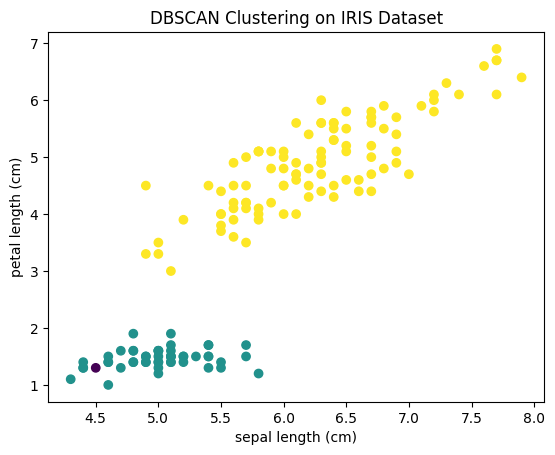

In [18]:
plt.scatter(X[:,0],X[:,2],c=db.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on IRIS Dataset")
plt.show()

In [19]:
# validate the cluster for using Silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(x_scaled,db.labels_)


0.504645610832545

# HYPERPARAMETERS FOR DBSCAN

In [6]:
from sklearn.neighbors import NearestNeighbors

In [7]:
import pandas as pd 
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
features = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
features = StandardScaler().fit_transform(features)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(features)
distance,indices = nbrs.kneighbors(features)

In [10]:
import numpy as np

In [11]:
# sort distance
distance = np.sort(distance, axis=0)
distance = distance[:,1]

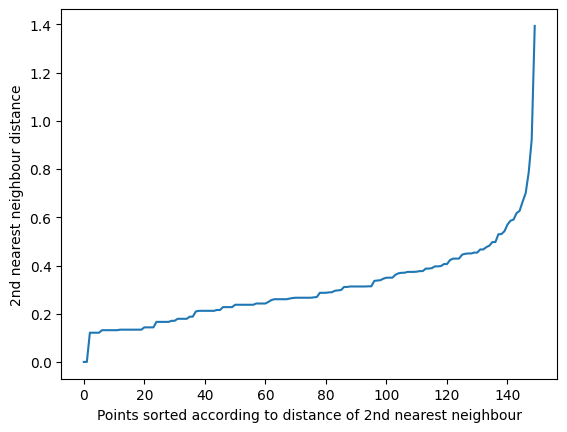

In [12]:
# Plot the k-distance
plt.plot(distance)
plt.xlabel("Points sorted according to distance of 2nd nearest neighbour")
plt.ylabel("2nd nearest neighbour distance")
plt.show()